<a href="https://colab.research.google.com/github/NegiArvind/LeafClassification/blob/master/leaf_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# For google colab 
path="/content/drive/My Drive/LeafClassification/"

# For system
# path=""

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/My Drive/LeafClassfication"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
ls: cannot access '/content/drive/My Drive/LeafClassfication': No such file or directory


In [0]:
# !sudo apt-get install python-skimage

In [0]:
import numpy as np
import tensorflow as tf
import math
from skimage.transform import resize,rotate,rescale
from PIL import Image
import h5py
from tensorflow.python.framework import ops
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import os
import cv2
import random
from sklearn.utils import shuffle
import pickle as pkl
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [0]:
np.random.seed(1)
x=np.random.rand(4)
np.random.seed(1)
y=np.random.rand(4)
print(x)
print(y)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]


In [0]:
# !pip freeze

In [0]:
def one_hot_encode(y,n_labels):
    return np.eye(n_labels)[y]

In [0]:
classes=os.listdir(path+"leaf_dataset")
n_class=len(classes)
samples_per_class=16
image_width=32 # width of image
image_height=32 # height of image
n_channel=1 # number of channels
m=n_class*samples_per_class # Number of samples))

train_ratio=0.7
validation_ratio=0.2
test_ratio=0.1

ntraining_samples=int(samples_per_class*train_ratio)
nvalidation_samples=int(samples_per_class*validation_ratio)
ntest_samples=samples_per_class-ntraining_samples-nvalidation_samples


In [0]:
def get_augumented_images(image):
    
#     print(image.shape)
    augumented_images=[]
#     augumented_images=np.zeros((6,50,50,1))
    augumented_images.append(image)
#     augumented_images[0]=image
#     img=rotate(image, angle=90, mode='reflect',resize=True)
#     plt.imshow(img.reshape(image_height,image_width))
#     print(img.shape)

    # Rotation
    rot90=rotate(image, angle=90, mode='reflect',resize=True)
    rot90=cv2.resize(rot90, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)
#     print(augumented_images[1].shape)
    augumented_images.append(rot90)
    
    rot180=rotate(image, angle=180, mode='reflect',resize=True)
    rot180=cv2.resize(rot180, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)
    
#     print(augumented_images[2].shape)
    augumented_images.append(rot180)
  
    rot270=rotate(image, angle=270, mode='reflect',resize=True)
    rot270=cv2.resize(rot270, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)
#     print(augumented_images[3].shape)
    augumented_images.append(rot270)
  
  
    #Scaling
    scale_out=rescale(image, scale=2.0, mode='constant')
#     print("Scale out",scale_out.shape)
    augumented_images.append(cv2.resize(scale_out, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel))
#     augumented_images[4]=cv2.resize(scale_out, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)
#     print(augumented_images[4].shape)
    scale_in=rescale(image, scale=0.5, mode='constant')
#     print("Scale in",scale_in.shape)
    augumented_images.append(cv2.resize(scale_in, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel))
#     augumented_images[5]=cv2.resize(scale_in, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)
#     print(augumented_images[5].shape)
#     augumented_images.append((rescale(img, scale=0.5, mode='constant')).cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel))
    
# scale_in = skimage.transform.rescale(img, scale=0.5, mode='constant')
    #
#     print(type(augumented_images[0]))
    return augumented_images

In [0]:
# Testing purpose

# l=[]
# image=img.imread("/content/drive/My Drive/LeafClassification/leaf_dataset/Acer_Campestre/Acer_Campestre_01.ab.jpg")
# image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
# p=get_augumented_images(image)
# # print("p",type(p),p.shape)
# l.extend(p)
# l=np.asarray(l)
# print(l.dtype)
# print(l.shape)
# !ls "/content/drive/My Drive/LeafClassification/leaf_dataset/Acer_Campestre/Acer_Campestre_01.ab.jpg"

In [0]:
def load_dataset(isSave):
    
    # isSave will be true when we want to save the data in pkl and will be false when 
    # we want to get the data from pkl
    if isSave:
        classes=os.listdir(path+"leaf_dataset")

        n_class=len(classes)
        samples_per_class=16
        image_width=32 # width of image
        image_height=32 # height of image
        n_channel=1 # number of channels
        m=n_class*samples_per_class # Number of samples))

        train_ratio=0.7
        validation_ratio=0.2
        test_ratio=0.1

        ntraining_samples=int(samples_per_class*train_ratio)
        nvalidation_samples=int(samples_per_class*validation_ratio)
        ntest_samples=samples_per_class-ntraining_samples-nvalidation_samples
        

        print("m",m)
        print("classes",len(classes))
        print("ntraining_samples",ntraining_samples)
        print("nvalidation_samples",nvalidation_samples)
        print("ntest_samples",ntest_samples)

#         x_train_set=np.zeros((ntraining_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)
#         x_validation_set=np.zeros((nvalidation_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)
#         x_test_set=np.zeros((ntest_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)

#         y_train_set=np.zeros((ntraining_samples*n_class),dtype=int)
#         y_validation_set=np.zeros((nvalidation_samples*n_class),dtype=int)
#         y_test_set=np.zeros((ntest_samples*n_class),dtype=int)
        
        x_train_set=[]
        y_train_set=[]
        x_validation_set=[]
        y_validation_set=[]
        x_test_set=[]
        y_test_set=[]

        train_count=0
        test_count=0
        validation_count=0
        
        print("Data is Saving .....")

        for count,class_name in enumerate(classes):
            class_name_path=path+"leaf_dataset/"+class_name+"/"

            images=os.listdir(class_name_path);
            random.shuffle(images)

            train_images=images[:ntraining_samples]
            validation_images=images[ntraining_samples:ntraining_samples+nvalidation_samples]
            test_images=images[ntraining_samples+nvalidation_samples:]

#             print("train_images",train_images)
#             print("validation_images",validation_images)
#             print("test_images",test_images)

            # Filling training set
            for image_name in train_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name)
    #             print(image.shape)
                image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
                augumented_images=get_augumented_images(image)
#                 x_train_set[train_count]=image
#                 y_train_set[train_count]=count
                x_train_set.extend(augumented_images)
                temp=[count]*len(augumented_images)
                y_train_set.extend(temp)
#                 train_count+=1

            # Filling validation set
            for image_name in validation_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name)
    #             print(image.shape)
                image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
#                 x_validation_set[validation_count]=image
#                 y_validation_set[validation_count]=count
                x_validation_set.append(image)
                y_validation_set.append(count)
#                 validation_count+=1

            # Filling test set
            for image_name in test_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name,)
    #             print(image.shape)
                image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
#                 x_test_set[test_count]=image
#                 y_test_set[test_count]=count
                x_test_set.append(image)
                y_test_set.append(count)
#                 test_count+=1

#         print(len(classes))
    #     np.set_printoptions(threshold=np.inf)
#         print("y_train_set",y_train_set.shape,y_train_set)
#         print("y_validation_set",y_validation_set.shape,y_validation_set)
#         print("y_test_set",y_test_set.shape,y_test_set)
#         print("Earlier",x_train_set.dtype)
        x_train_set=np.asarray(x_train_set,dtype=np.float32)
        y_train_set=np.asarray(y_train_set)
        x_validation_set=np.asarray(x_validation_set,dtype=np.float32)
        y_validation_set=np.asarray(y_validation_set)
        x_test_set=np.asarray(x_test_set,dtype=np.float32)
        y_test_set=np.asarray(y_test_set)
#         print("Later",x_train_set.shape,y_train_set.shape,x_test_set.shape,y_test_set.shape)

        x_train_set,y_train_set = shuffle(x_train_set,y_train_set, random_state=0) # This shuffles two array altoghether 
        x_validation_set,y_validation_set = shuffle(x_validation_set,y_validation_set, random_state=0)
        x_test_set,y_test_set = shuffle(x_test_set,y_test_set, random_state=0)
        
        with open(path+"xy_train_set.pkl",'wb') as f:
            print("train datatype",x_train_set.dtype)
            pkl.dump((x_train_set,y_train_set),f)
            
        with open(path+"xy_validation_set.pkl",'wb') as f:
            print("validation type",x_validation_set.dtype)
            pkl.dump((x_validation_set,y_validation_set),f)
            
        with open(path+"xy_test_set.pkl",'wb') as f:
            pkl.dump((x_test_set,y_test_set),f)
            
        with open(path+"class_names.pkl",'wb') as f:
            pkl.dump(classes,f)
        print("Data saved successfully")
        return x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set
            
    else:       
        with open(path+"xy_train_set.pkl",'rb') as f:
            x_train_set,y_train_set=pkl.load(f)
        
        with open(path+"xy_validation_set.pkl",'rb') as f:
            x_validation_set,y_validation_set=pkl.load(f)
            
        with open(path+"xy_test_set.pkl",'rb') as f:
            x_test_set,y_test_set=pkl.load(f)
        
        print("Data loaded successfully")
        return x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set


In [0]:
x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set=load_dataset(isSave=False)
# print(x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set)

Data loaded successfully


In [0]:
m,image_height,image_width,n_channel=x_train_set.shape
with open(path+"class_names.pkl",'rb') as f:
  class_names=pkl.load(f)
print(class_names)
n_labels=100
print(m,image_height,image_width,n_channel,n_labels,x_train_set.dtype,x_test_set.dtype,x_validation_set.dtype)

['Lithocarpus_Edulis', 'Salix_Intergra', 'Populus_Adenopoda', 'Quercus_Phillyraeoides', 'Quercus_Shumardii', 'Quercus_Phellos', 'Betula_Pendula', 'Quercus_Rubra', 'Quercus_Pubescens', 'Betula_Austrosinensis', 'Quercus_Pontica', 'Populus_Nigra', 'Alnus_Maximowiczii', 'Quercus_Kewensis', 'Celtis_Koraiensis', 'Quercus_Texana', 'Acer_Palmatum', 'Arundinaria_Simonii', 'Quercus_Semecarpifolia', 'Cornus_Chinensis', 'Fagus_Sylvatica', 'Alnus_Sieboldiana', 'Morus_Nigra', 'Cotinus_Coggygria', 'Acer_Rufinerve', 'Eucalyptus_Neglecta', 'Acer_Capillipes', 'Phildelphus', 'Castanea_Sativa', 'Quercus_Cerris', 'Quercus_Coccinea', 'Sorbus_Aria', 'Salix_Fragilis', 'Pterocarya_Stenoptera', 'Olea_Europaea', 'Quercus_Hartwissiana', 'Magnolia_Heptapeta', 'Zelkova_Serrata', 'Quercus_Rhysophylla', 'Quercus_Agrifolia', 'Acer_Circinatum', 'Tilia_Platyphyllos', 'Quercus_Castaneifolia', 'Quercus_Nigra', 'Magnolia_Salicifolia', 'Callicarpa_Bodinieri', 'Ginkgo_Biloba', 'Alnus_Rubra', 'Alnus_Cordata', 'Quercus_Suber',

Text(0.5, 1.0, 'Lithocarpus_Edulis')

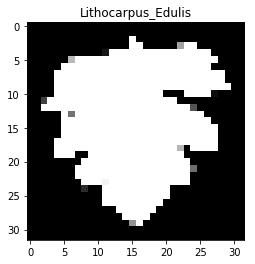

In [0]:
plt.imshow(x_train_set[0].reshape(image_height,image_width),cmap=plt.get_cmap('gray'))
plt.title(class_names[np.argmax(y_train_set[0])])

In [0]:
# datagen=ImageDataGenerator(rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# datagen.fit(x_train_set)
# count=0;
# for x_batch,y_batch in datagen.flow(x_train_set,y_train_set,batch_size=32,save_to_dir=path+"/Augumented/", save_prefix=class_names[np.argmax(y_batch[0])], save_format='png'):
# #   print(x_batch,y_batch)
#   print(x_batch.shape,y_batch.shape,type(x_batch))
#   count=count+32
# #   plt.imshow(x_batch[0],cmap=plt.get_cmap('gray'))
# #   plt.title(y_batch[0])
# #   plt.imshow(x_batch[1],cmap=plt.get_cmap('gray'))
# #   plt.title(y_batch[1])
# #   plt.imshow(x_batch[2])
# #   plt.title(y_batch[2])
# #   plt.imshow(x_batch[3])
# #   plt.title(y_batch[3])
# #   plt.imshow(x_batch[4])
# #   plt.title(y_batch[4])
# print(count)

In [0]:
# Applying hot_encoder to every y array of training set,validation test and test set

print(type(y_train_set))
y_train_set=one_hot_encode(y_train_set,n_labels)
y_validation_set=one_hot_encode(y_validation_set,n_labels)
y_test_set=one_hot_encode(y_test_set,n_labels)
print(y_train_set.shape)

<class 'numpy.ndarray'>
(6600, 100)


In [0]:
x=tf.placeholder(tf.float32,shape=[None,image_height,image_width,n_channel])
y=tf.placeholder(tf.float32,shape=[None,n_labels])
drop_prob=tf.placeholder(tf.float32)

In [0]:
def initialize_weight(shape):
    init_random_weight=tf.truncated_normal(shape,stddev=1.0)
    return tf.Variable(init_random_weight)

def initialize_bias(shape):
    init_random_bias=tf.constant(0.1,shape=shape) # initialize all the weights with 0.1
    return tf.Variable(init_random_bias)

def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,2,2,1],padding="SAME")

def max_pooling_2d(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

def convolution_layer(input_x,shape):
    w=initialize_weight(shape)
    b=initialize_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,w)+b)

def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1]) # getting the number of neuron unit in next layer
    w=initialize_weight([input_size,size])
    b=initialize_bias([size])
    return tf.matmul(input_layer,w)+b
    
    

In [0]:
# Model
print(x)

# Layer 1
convo_1=convolution_layer(x,shape=[5,5,1,32])
max_pooling_1=tf.nn.max_pool(convo_1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

# Layer 2
convo_2=convolution_layer(max_pooling_1,shape=[5,5,32,32])
max_pooling_2=tf.nn.max_pool(convo_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

# Layer 3
convo_3=convolution_layer(max_pooling_2,shape=[5,5,32,64])
max_pooling_3=tf.nn.max_pool(convo_3,ksize=[1,2,2,1],strides=[1,1,1,1],padding="SAME")
last_shape=max_pooling_3.get_shape()
print(last_shape)


convo_4=convolution_layer(max_pooling_3,shape=[5,5,64,64])
max_pooling_4=tf.nn.max_pool(convo_4,ksize=[1,2,2,1],strides=[1,1,1,1],padding="SAME")
last_shape=max_pooling_4.get_shape()
print(last_shape)

#Flattening
convo_4_flat=tf.reshape(max_pooling_4,[-1,last_shape[-1]*last_shape[-2]*last_shape[-3]])

#Fully connected layer 1
full_layer_one=tf.nn.relu(tf.layers.batch_normalization(normal_full_layer(convo_4_flat,1024),axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True))

# dropout
full_one_dropout=tf.nn.dropout(full_layer_one,rate=1-drop_prob)


#Fully connected layer 2
full_layer_two=tf.nn.relu(tf.layers.batch_normalization(normal_full_layer(full_one_dropout,512),axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True))

# dropout
full_two_dropout=tf.nn.dropout(full_layer_two,rate=1-drop_prob)

#Fully connected layer 3
full_layer_three=tf.nn.relu(tf.layers.batch_normalization(normal_full_layer(full_two_dropout,256),axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True))

# dropout
full_three_dropout=tf.nn.dropout(full_layer_three,rate=1-drop_prob)


#Final layer
output_layer=normal_full_layer(full_three_dropout,n_labels)
print("Output layer shape ",output_layer.get_shape())
y_predict=output_layer

Tensor("Placeholder_9:0", shape=(?, 50, 50, 1), dtype=float32)
(?, 2, 2, 64)
(?, 1, 1, 64)
Output layer shape  (?, 100)


In [0]:
# Loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=y_predict))


In [0]:
# Optimizer
optimizer=tf.train.AdamOptimizer(learning_rate=0.00001)
train=optimizer.minimize(cross_entropy)

In [0]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [0]:
def next_batch(i,batch_size):
    batch_x=x_train_set[i:i+batch_size]
    batch_y=y_train_set[i:i+batch_size]
    return batch_x,batch_y

In [0]:
steps=800
batch_size=64
train_accuracy_list=[]
validation_accuracy_list=[]
with tf.Session() as sess:
    sess.run(init)
    for j in range(steps):
        print("Steps :",j)
        for i in range(0,m,batch_size):
          batch_x,batch_y=next_batch(i,batch_size)
#           i=(i+batch_size)/m
          sess.run(train,feed_dict={x: batch_x,y:batch_y,drop_prob:1.0})
          
#           print("Step : ",j,"Batch : ",i/batch_size,sep='\t')
        print("Train Accuracy")
        matches=tf.equal(tf.argmax(y_predict,1),tf.argmax(y,1))
        accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
        train_accuracy=sess.run(accuracy,feed_dict={x:x_train_set,y:y_train_set,drop_prob:1.0})
        print(train_accuracy)
        
        train_accuracy_list.append(train_accuracy)
        print("Validation Accuracy")
        validation_accuracy=sess.run(accuracy,feed_dict={x:x_validation_set,y:y_validation_set,drop_prob:1.0})
        print(validation_accuracy)
        validation_accuracy_list.append(validation_accuracy)
        print("\n")
    saved_model_path=saver.save(sess,path+"TrainedModel/leaf_model.ckpt")
    print("Model saved in path ",saved_model_path)
   

Steps : 0
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 1
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 2
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 3
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 4
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 5
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 6
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 7
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 8
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 9
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 10
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 11
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 12
Train Accuracy
0.011363637
Validation Accuracy
0.01


Steps : 13


KeyboardInterrupt: ignored

In [0]:
plt.plot(np.arange(0,steps),train_accuracy_list,'-',np.arange(0,steps),validation_accuracy_list,'-')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

In [0]:
# Testing the model on test set
with tf.Session() as sess:
    saver.restore(sess,path+"TrainedModel/leaf_model.ckpt")
    print("Train Acccuracy")
    print(sess.run(accuracy,feed_dict={x:x_test_set,y:y_test_set,drop_prob:1.0}))

## New Approach or New Model

In [0]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

image_size = 32
num_channels = 1
batch_size = 64
patch_size = 5
depth = 64
num_hidden = 256

num_labels = 100
reg_parameter = 0.001
learn_rate = 0.01
keep_prob = 0.9


class Network():
    def __init__(self, is_training):
        # Input data.
        self.data = tf.placeholder(shape=[None, image_size, image_size, 1], dtype=tf.float32, name='input')
        self.labels = tf.placeholder(shape=[None,num_labels], dtype=tf.int32)
#         self.label_oh = slim.layers.one_hot_encoding(self.labels, num_labels)

        ### Variables.
        # Weights
        self.layer1_weights = tf.Variable(tf.truncated_normal(
            [patch_size, patch_size, num_channels, depth], stddev=0.1),
            name="layer1_weights")
        self.layer2_weights = tf.Variable(tf.truncated_normal(
            [patch_size, patch_size, depth, depth], stddev=0.1),
            name="layer2_weights")
        self.layer3_weights = tf.Variable(tf.truncated_normal(
            [16 * image_size // 4 * image_size // 4 * depth, 512], stddev=0.1),
            name="layer3_weights")
        self.layer4_weights = tf.Variable(tf.truncated_normal(
            [512, num_hidden], stddev=0.1),name="layer3_weights")
        self.layer5_weights = tf.Variable(tf.truncated_normal(
            [num_hidden, num_labels], stddev=0.1),
            name="layer4_weights")
        

        # Biases
        # self.layer1_biases = tf.Variable(tf.zeros([depth]), name="layer1_biases")
        # self.layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]),
        #     name="layer2_biases")
        # self.layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]),
        #     name="layer3_biases")
        self.layer5_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]),
            name="layer5_biases")

        # Model
        # 1st Convolution
        self.conv = tf.nn.conv2d(self.data, self.layer1_weights, [1, 1, 1, 1], padding='SAME')
        print("Conv1",self.conv.get_shape())
        # batch normalize conv
        self.conv = batch_norm_wrapper(self.conv, is_training)
        print("batch1",self.conv.get_shape())
        # Relu activation of conv
        self.layer1 = tf.nn.relu(self.conv)
        print("relu1",self.layer1.get_shape())
        # Apply dropout
        self.layer1 = tf.nn.dropout(self.layer1, keep_prob)
        print("dropout1",self.layer1.get_shape())
        # 2nd Convolution
        self.conv = tf.nn.conv2d(self.layer1, self.layer2_weights, [1, 1, 1, 1], padding='SAME')
        print("Conv2",self.conv.get_shape())
        
        # batch normalize conv
        self.conv = batch_norm_wrapper(self.conv, is_training)
        print("batch2",self.conv.get_shape())
        
        # Relu activation of conv
        self.layer2 = tf.nn.relu(self.conv)
        print("relu2",self.layer2.get_shape())
        
        # Apply dropout
        self.layer2 = tf.nn.dropout(self.layer2, keep_prob)
        
        print("dropout2",self.layer2.get_shape())
        
        # Resize second layer output for fully connceted layer
        self.shape = self.layer2.get_shape().as_list()
        self.reshape = tf.reshape(self.layer2,
            # tf.pack([tf.shape(self.data)[0], self.shape[1] * self.shape[2] * self.shape[3]]))
            tf.stack([tf.shape(self.data)[0], self.shape[1] * self.shape[2] * self.shape[3]]))
        
        # 1st fully connected layer
        self.connected = tf.matmul(self.reshape, self.layer3_weights)
        print("fully1",self.connected.get_shape())
        
        # batch normalize
        self.connected = batch_norm_wrapper(self.connected, is_training)
        print("batch1",self.connected.get_shape())
        
        # 1st fully connected layer with relu activation
        self.layer3 = tf.nn.relu(self.connected)
        print("relu",self.layer3.get_shape())
        # Apply dropout
        self.layer3 = tf.nn.dropout(self.layer3, keep_prob)
        print("dropout",self.layer3.get_shape())
        
        # 2nd fully connected layer
        self.connected = tf.matmul(self.layer3, self.layer4_weights)
        print("full2",self.connected.get_shape())
        # batch normalize
        self.connected = batch_norm_wrapper(self.connected, is_training)
        print("batch",self.connected.get_shape())
        # 1st fully connected layer with relu activation
        self.layer4 = tf.nn.relu(self.connected)
        print("relu",self.layer4.get_shape())
        # Apply dropout
        self.layer4 = tf.nn.dropout(self.layer4, keep_prob)
        print("dropout",self.layer4.get_shape())
        
        # 3rd fully connected layer
        self.logits = tf.matmul(self.layer4, self.layer5_weights) + self.layer5_biases
        print("output",self.logits.get_shape())
        # Softmax Predictions
        self.probs = tf.nn.softmax(self.logits)
        print("softmax",self.probs.get_shape())

        # Training computation.
        self.loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.labels))
        # self.loss = tf.reduce_mean(-tf.reduce_sum(
            # self.label_oh * tf.log(self.probs) + 1e-10, reduction_indices=[1]))

        # Optimizer.
        self.trainer = tf.train.AdamOptimizer(learning_rate=learn_rate)
        # minimization
        self.update = self.trainer.minimize(self.loss)


# Batch Norm Wrapper inspired by http://r2rt.com/implementing-batch-normalization-in-tensorflow.html

def batch_norm_wrapper(inputs, is_training, decay=0.999, epsilon=1e-3):
    scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]))
    beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]))
    sample_mean = tf.Variable(tf.zeros(inputs.get_shape()[1:]), trainable=False)
    sample_variance = tf.Variable(tf.ones(inputs.get_shape()[1:]), trainable=False)

    if is_training:
        batch_mean, batch_variance = tf.nn.moments(inputs, [0])
        train_mean = tf.assign(sample_mean,
            sample_mean * decay + batch_mean * (1 - decay))
        train_variance = tf.assign(sample_variance,
            sample_variance * decay + batch_variance * (1 - decay))
        with tf.control_dependencies([train_mean, train_variance]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_variance, beta, scale, epsilon)
    else:
        return tf.nn.batch_normalization(inputs,
            sample_mean, sample_variance, beta, scale, epsilon)

In [0]:
mainN = Network(is_training=True)
# mainN.summary()

Conv1 (?, 32, 32, 64)
batch1 (?, 32, 32, 64)
relu1 (?, 32, 32, 64)
dropout1 (?, 32, 32, 64)
Conv2 (?, 32, 32, 64)
batch2 (?, 32, 32, 64)
relu2 (?, 32, 32, 64)
dropout2 (?, 32, 32, 64)
fully1 (?, 512)
batch1 (?, 512)
relu (?, 512)
dropout (?, 512)
full2 (?, 256)
batch (?, 256)
relu (?, 256)
dropout (?, 256)
output (?, 100)
softmax (?, 100)


In [0]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])

Minibatch loss at step 0: 5.327022 
Minibatch accuracy: 0.0% 
Validation accuracy: 6.3%
Saved Model
Minibatch loss at step 5: 4.639953 
Minibatch accuracy: 6.2% 
Validation accuracy: 14.3%
Saved Model
Minibatch loss at step 10: 4.340534 
Minibatch accuracy: 3.1% 
Validation accuracy: 15.7%
Saved Model
Minibatch loss at step 15: 3.580505 
Minibatch accuracy: 17.2% 
Validation accuracy: 19.0%
Saved Model
Minibatch loss at step 20: 3.098834 
Minibatch accuracy: 17.2% 
Validation accuracy: 24.0%
Saved Model
Minibatch loss at step 25: 3.382073 
Minibatch accuracy: 14.1% 
Validation accuracy: 29.3%
Saved Model
Minibatch loss at step 30: 3.318089 
Minibatch accuracy: 23.4% 
Validation accuracy: 28.3%
Saved Model
Minibatch loss at step 35: 2.981353 
Minibatch accuracy: 20.3% 
Validation accuracy: 32.7%
Saved Model
Minibatch loss at step 40: 2.520767 
Minibatch accuracy: 34.4% 
Validation accuracy: 37.3%
Saved Model
Minibatch loss at step 45: 2.538171 
Minibatch accuracy: 25.0% 
Validation accu

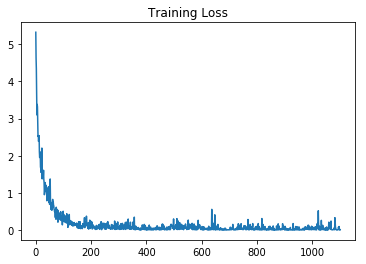

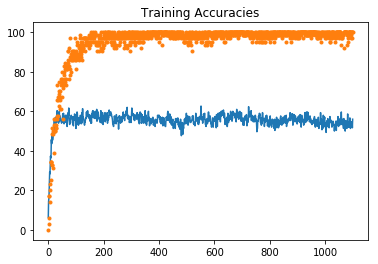

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import argparse
import tensorflow.contrib.slim as slim

# from model_helpers import *
# from data_helpers import *
# from network import *

# Setting the training parameters

# Number of possible actions
actions = 100
# How many experience traces to use for each training step.
batch_size = 64
# Number of training steps
num_steps = 3001

# The path to save our model to.
# path = path+"./cnn"
train_dataset=x_train_set
train_labels=y_train_set
valid_dataset=x_validation_set
valid_labels=y_validation_set
losses = []
train_accuracies = []
validation_accuracies=[]
def train(load_model=False):
    # load data
#     images, labels = load_data()

    # convert to training and validation sets
#     x_train, x_valid, train_labels, valid_labels = split_data(images, labels)
#     train_dataset = reformat(x_train)
#     valid_dataset = reformat(x_valid)

    tf.reset_default_graph()
    mainN = Network(is_training=True)

    init = tf.initialize_all_variables()

    saver = tf.train.Saver(max_to_keep=5)

    # Make list to store losses, accuracies
#     losses = []
#     accuracies = []
    # Make a path for our model to be saved in.
    if not os.path.exists(path):
        os.makedirs(path)

    with tf.Session() as sess:
        if load_model is True:
            print('Loading Model...')
            ckpt = tf.train.get_checkpoint_state(path)
            saver.restore(sess, ckpt.model_checkpoint_path)
            print('Model Successfully Loaded')
        else:
            sess.run(init)

        for step in range(num_steps):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
            batch_labels = train_labels[offset:(offset + batch_size)]
            
            _, lossA, yP, LO = sess.run([mainN.update, mainN.loss, mainN.probs, mainN.labels],
                feed_dict={mainN.data: batch_data, mainN.labels: batch_labels})
#             losses.append(lossA)
#             accuracies.append(accuracy(yP, LO))
            if (step % 5 == 0):
                minibatch_loss=(step, lossA)
                print('Minibatch loss at step %d: %f ' % minibatch_loss)
                batch_train_accuracy=accuracy(yP, LO)
                print('Minibatch accuracy: %.1f%% ' %batch_train_accuracy )
                losses.append(lossA)
                train_accuracies.append(batch_train_accuracy)
                yP, LO = sess.run([mainN.probs, mainN.labels],
                    feed_dict={mainN.data: valid_dataset, mainN.labels: valid_labels})
                validation_accuracy=accuracy(yP, LO)
                print('Validation accuracy: %.1f%%' % validation_accuracy)
                validation_accuracies.append(validation_accuracy)
                saver.save(sess, path+'/model-'+str(step)+'.cptk')
                print("Saved Model")
        yP, LO = sess.run([mainN.probs, mainN.labels],
            feed_dict={mainN.data: valid_dataset, mainN.labels: valid_labels})
        print('Validation accuracy: %.1f%%' % accuracy(yP, LO))
        saver.save(sess, path+'/model-'+str(step)+'.cptk')
        print("Saved Model")
        plt.figure(1)
        plt.title('Training Loss')
        plt.plot(range(len(losses)), losses)
        plt.figure(2)
        plt.title('Training Accuracies')
        plt.plot(range(len(validation_accuracies)), validation_accuracies,'-',range(len(train_accuracies)),train_accuracies,'.')
        plt.show()


def validate():
    tf.reset_default_graph()
    mainN = Network(is_training=False)

    saver = tf.train.Saver(max_to_keep=5)

    # load data
    images, labels = load_data()

    # convert to training and validation sets
    x_train, x_valid, train_labels, valid_labels = split_data(images, labels)
    valid_dataset = reformat(x_valid)

    with tf.Session() as sess:
        print('Loading Model...')
        ckpt = tf.train.get_checkpoint_state(path)
        saver.restore(sess, ckpt.model_checkpoint_path)
        print('Model Loaded!')

        yP, LO = sess.run([mainN.probs, mainN.label_oh],
            feed_dict={mainN.data: valid_dataset, mainN.labels: valid_labels})
        print('Validation accuracy: %.1f%%' % accuracy(yP, LO))


def test():
    tf.reset_default_graph()
    mainN = Network(is_training=False)

    saver = tf.train.Saver(max_to_keep=5)

    # load data
    images, image_id, species = load_test_data()

    test_dataset = reformat(images)
    test_dataset.astype(float)
    with tf.Session() as sess:
        print('Loading Model...')
        ckpt = tf.train.get_checkpoint_state(path)
        saver.restore(sess, ckpt.model_checkpoint_path)
        print('Model Loaded!')

        yP = sess.run([mainN.probs], feed_dict={mainN.data: test_dataset})
        np.save('testProbs', yP)
        print('Completed processing {} test images'.format(str(image_id.shape[0])))
        write_results_to_file(species, image_id, yP)


def writeResults():
    # load data
    images, image_id, species = load_test_data()
    # load saved results
    probs = np.load('testProbs.npy')
    write_results_to_file(species, image_id, probs)


def main():
    train(False)
#     parser = argparse.ArgumentParser(description="Train or run leaf classifier")
#     parser.add_argument("-m", "--mode", help="Train / Run / Validate", required=True)
#     parser.add_argument("-l", "--load", help="Load previously trained weights? True/False")
#     args = vars(parser.parse_args())
#     if args['mode'] == 'Train':
#         if args['load']:
#             if args['load'] == 'True':
#                 train(load_model=True)
#         else:
#             train(load_model=False)
#     elif args['mode'] == 'Test':
#         test()
#     elif args['mode'] == 'Validate':
#         validate()
#     elif args['mode'] == 'Write':
#         writeResults()
#     else:
#         print(':p Invalid Mode.')


if __name__ == "__main__":
    main()

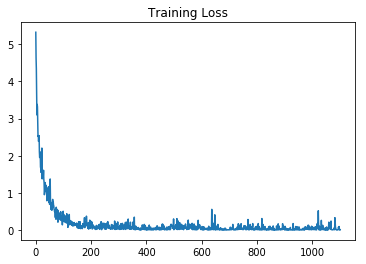

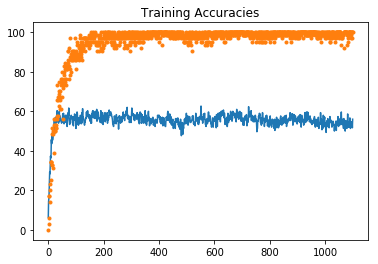

In [0]:
plt.figure(1)
plt.title('Training Loss')
plt.plot(range(len(losses)), losses)
plt.figure(2)
plt.title('Training Accuracies')
plt.plot(range(len(validation_accuracies)), validation_accuracies,'-',range(len(train_accuracies)),train_accuracies,'.')
plt.show()